In [1]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
df = pd.read_csv(r'..\Data\FB.csv')

In [ ]:
df.head(10)

In [3]:
X = df['Close']

In [4]:
test = X.iloc[-30:]

In [5]:
train = X.iloc[:-30]

In [ ]:
''''
smoothing_level (float, optional) – The smoothing_level value of the simple exponential smoothing, if the value is set then this value will be used as the value.
optimized (bool) – Should the values that have not been set above be optimized automatically?
''''

In [6]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
resu = []
temp_df = pd.DataFrame()
#df2 = pd.DataFrame(columns=['smoothing parameter', 'RMSE'])
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE']).head(3)

In [8]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.1,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 130.19890782430633
MAE is : 10.578096050945016
RMSE is : 11.41047360210374
MAPE is : 5.371184257014935
R2 is : -6.113609198116427



In [9]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 97.68044570185559
MAE is : 8.909413782094074
RMSE is : 9.883341828645591
MAPE is : 4.51628082001638
R2 is : -4.336915098846252



In [10]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,SimpleExpSmoothing,SSE,8965.774
Optimized:,True,AIC,2446.285
Trend:,None,BIC,2456.513
Seasonal:,None,AICC,2446.318
Seasonal Periods:,None,Date:,"Fri, 01 Apr 2022"
Box-Cox:,False,Time:,17:48:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9808445,alpha,True
initial_level,76.525895,l.0,True


In [11]:

df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(1229    , 1259)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")


In [12]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(1229    , 1259)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

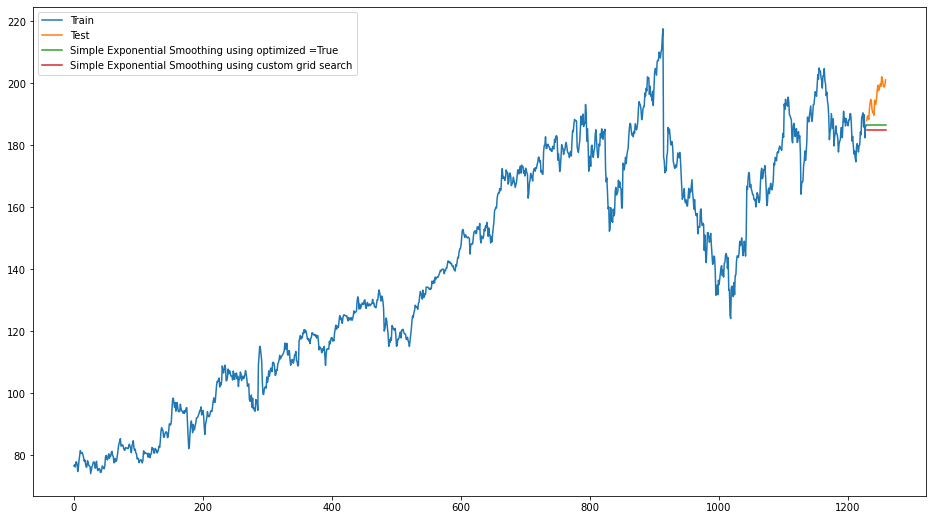

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()